In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import yfinance as yf
from datetime import datetime

# 1 Collect the data

In [3]:
now = datetime.now()
start = datetime(now.year-10, now.month, now.day)
end = now
ticker = "AAPL"

df = yf.download(ticker, start, end)
# df = yf.download(ticker, period="7d", interval="1h")
df
# df = yf.Ticker(ticker)
# df.option_chain(df.options[0]).calls
# df.info  ==> donne toutes les informations de l'entreprise ==> trop fort.

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-03-23,28.409513,28.552443,28.255417,28.389415,150838800
2015-03-24,28.293383,28.594873,28.264349,28.413980,131369200
2015-03-25,27.554169,28.322416,27.554169,28.259885,206620800
2015-03-26,27.746231,27.889161,27.379974,27.415707,190291600
2015-03-27,27.525137,27.848961,27.449206,27.819929,158184800
...,...,...,...,...,...
2025-03-17,214.000000,215.220001,209.970001,213.309998,48073400
2025-03-18,212.690002,215.149994,211.490005,214.160004,42432400


# 2 Data Exploration & Visualization

In [4]:
# Pour determiner le nombre de lignes et colonnes
df.shape

(2516, 5)

In [5]:
# Pour déterminer si il y a des valeurs nulles
df.isna().sum()

Price   Ticker
Close   AAPL      0
High    AAPL      0
Low     AAPL      0
Open    AAPL      0
Volume  AAPL      0
dtype: int64

In [6]:
# Statistiques des données
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2516.000000,2516.000000,2516.000000,2516.000000,2.516000e+03
mean,98.598170,99.567162,97.523108,98.510169,1.130305e+08
std,67.888591,68.530340,67.155681,67.818031,6.549882e+07
min,20.674534,20.978908,20.475433,20.596724,2.323470e+07
25%,36.567543,36.933802,36.308793,36.659005,6.916250e+07
50%,72.836327,73.667546,71.863845,72.753973,9.713945e+07
75%,156.311142,158.442514,153.933856,156.649636,1.375516e+08
max,258.735504,259.814335,257.347047,257.906429,6.488252e+08


In [7]:
# Le type de données de chaque colonnes
df.dtypes

Price   Ticker
Close   AAPL      float64
High    AAPL      float64
Low     AAPL      float64
Open    AAPL      float64
Volume  AAPL        int64
dtype: object

In [8]:
df.head()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-03-23,28.409513,28.552443,28.255417,28.389415,150838800
2015-03-24,28.293383,28.594873,28.264349,28.413980,131369200
2015-03-25,27.554169,28.322416,27.554169,28.259885,206620800
2015-03-26,27.746231,27.889161,27.379974,27.415707,190291600
2015-03-27,27.525137,27.848961,27.449206,27.819929,158184800


In [9]:
# On doit travailler sur un index numérique et non sur dates
df = df.reset_index()
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-03-23,28.409513,28.552443,28.255417,28.389415,150838800
1,2015-03-24,28.293383,28.594873,28.264349,28.413980,131369200
2,2015-03-25,27.554169,28.322416,27.554169,28.259885,206620800
3,2015-03-26,27.746231,27.889161,27.379974,27.415707,190291600
4,2015-03-27,27.525137,27.848961,27.449206,27.819929,158184800


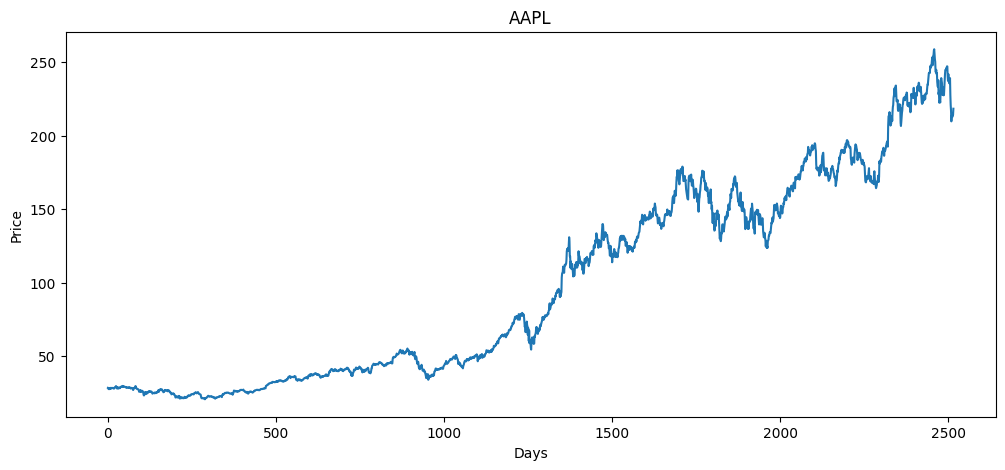

In [10]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.title(ticker)
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()

# 3 Feature Engineering

In [11]:
df1 = pd.DataFrame({"0":[10, 20, 30, 40, 50, 60, 70, 80, 90, 10]})
df1

,0
0,10
1,20
2,30
3,40
4,50
5,60
6,70
7,80
8,90
9,10


In [12]:
df1['MA_5'] = df1.rolling(5).mean()
df1

,0,MA_5
0,10,NaN
1,20,NaN
2,30,NaN
3,40,NaN
4,50,30.0
5,60,40.0
6,70,50.0
7,80,60.0
8,90,70.0
9,10,62.0


### 100 days Moving Average

In [13]:
df['MA_100'] = df.Close.rolling(100).mean()
df

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2015-03-23,28.409513,28.552443,28.255417,28.389415,150838800,NaN
1,2015-03-24,28.293383,28.594873,28.264349,28.413980,131369200,NaN
2,2015-03-25,27.554169,28.322416,27.554169,28.259885,206620800,NaN
3,2015-03-26,27.746231,27.889161,27.379974,27.415707,190291600,NaN
4,2015-03-27,27.525137,27.848961,27.449206,27.819929,158184800,NaN
...,...,...,...,...,...,...,...
2511,2025-03-17,214.000000,215.220001,209.970001,213.309998,48073400,235.672317
2512,2025-03-18,212.690002,215.149994,211.490005,214.160004,42432400,235.439610
2513,2025-03-19,215.240005,218.759995,213.750000,214.220001,54385400,235.238590


In [14]:
df.tail()

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
2511,2025-03-17,214.000000,215.220001,209.970001,213.309998,48073400,235.672317
2512,2025-03-18,212.690002,215.149994,211.490005,214.160004,42432400,235.439610
2513,2025-03-19,215.240005,218.759995,213.750000,214.220001,54385400,235.238590
2514,2025-03-20,214.100006,217.490005,212.220001,213.990005,48862900,235.077057
2515,2025-03-21,218.270004,218.839996,211.279999,211.559998,93954500,234.959121


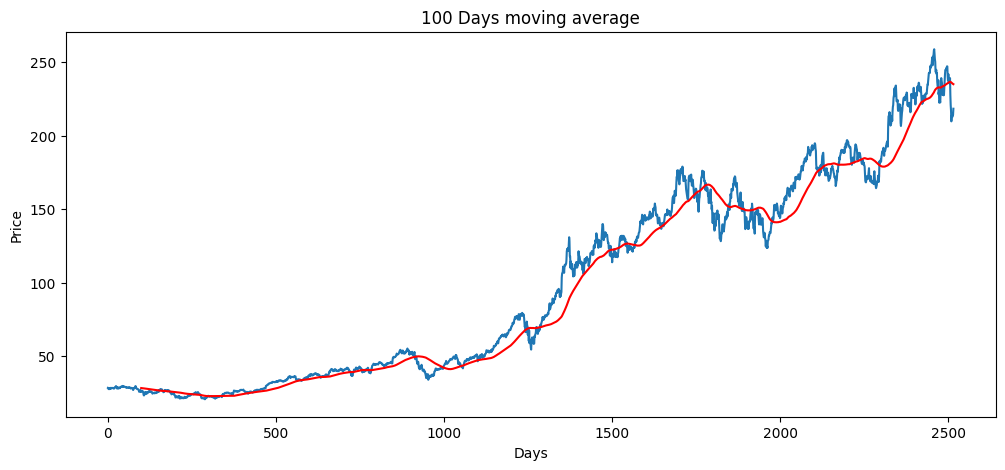

In [15]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(df['MA_100'], "r")
plt.title("100 Days moving average")
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()


# 200 days Moving Average

In [16]:
df['MA_200'] = df.Close.rolling(200).mean()
df.head(203)

Price,Date,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2015-03-23,28.409513,28.552443,28.255417,28.389415,150838800,NaN,NaN
1,2015-03-24,28.293383,28.594873,28.264349,28.413980,131369200,NaN,NaN
2,2015-03-25,27.554169,28.322416,27.554169,28.259885,206620800,NaN,NaN
3,2015-03-26,27.746231,27.889161,27.379974,27.415707,190291600,NaN,NaN
4,2015-03-27,27.525137,27.848961,27.449206,27.819929,158184800,NaN,NaN
...,...,...,...,...,...,...,...,...
198,2016-01-04,23.834372,23.838897,23.076468,23.214475,270597600,25.631260,NaN
199,2016-01-05,23.237106,23.947500,23.169235,23.924876,223164000,25.604024,26.937573
200,2016-01-06,22.782354,23.160176,22.594577,22.750681,273829600,25.572442,26.909438


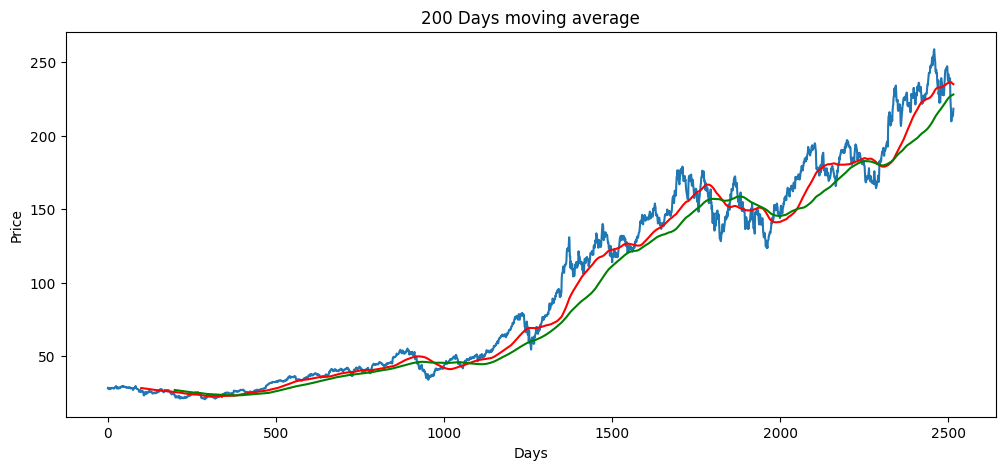

In [17]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(df['MA_100'], "r")
plt.plot(df['MA_200'], "g")
plt.title("200 Days moving average")
plt.xlabel("Days")
plt.ylabel("Price")
plt.show()

### Calculating % changed in each trading session

In [18]:
df['percentage changed'] = df.Close.pct_change()
df[['Close', 'percentage changed']]

Price,Close,percentage changed
Ticker,AAPL,
0,28.409513,NaN
1,28.293383,-0.004088
2,27.554169,-0.026127
3,27.746231,0.006970
4,27.525137,-0.007968
...,...,...
2511,214.000000,0.002389
2512,212.690002,-0.006121
2513,215.240005,0.011989


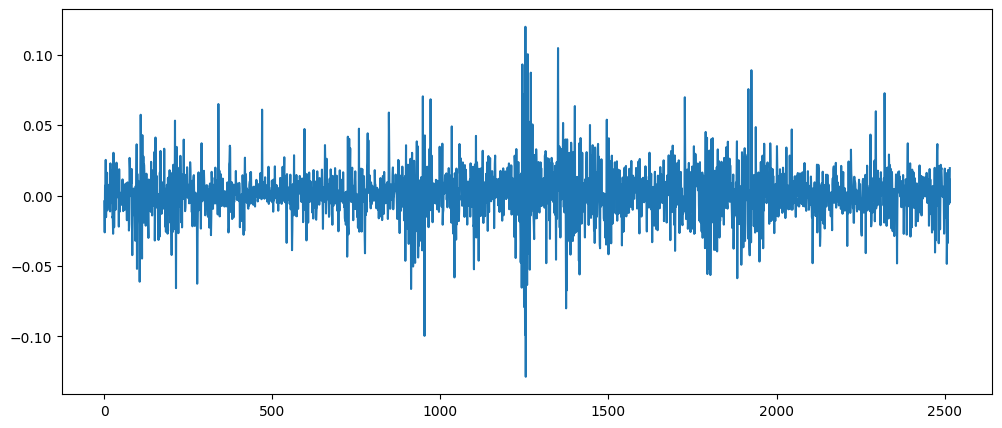

In [19]:
plt.figure(figsize=(12,5))
plt.plot(df['percentage changed'])
plt.show()

# 4 Data Preprocessing

In [20]:
df.shape

(2516, 9)

# Splitting data into training & testing datasets

In [21]:
data_training= pd.DataFrame(df.Close[0:int(len(df)*0.7)])
data_testing= pd.DataFrame(df.Close[int(len(df)*0.7):-1])
print(data_training)
print(data_testing)

Ticker        AAPL
0        28.409513
1        28.293383
2        27.554169
3        27.746231
4        27.525137
...            ...
1756    152.262833
1757    148.218338
1758    152.617050
1759    157.045334
1760    158.058899

[1761 rows x 1 columns]
Ticker        AAPL
1761    161.365341
1762    162.742996
1763    166.128143
1764    167.495972
1765    171.294403
...            ...
2510    213.490005
2511    214.000000
2512    212.690002
2513    215.240005
2514    214.100006

[754 rows x 1 columns]


# Scaling down the data between 0 and 1

In [22]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [23]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.04889201],
       [0.04815796],
       [0.04348547],
       ...,
       [0.83399513],
       [0.86198586],
       [0.8683925 ]])

In [24]:
data_training_array.shape

(1761, 1)

# 5 Sequence Creation

In [25]:
x_train = []                 # Training data
y_train = []                 # predictive data

for i in range(100, data_training_array.shape[0]):
    x_train.append(data_training_array[i-100: i])
    y_train.append(data_training_array[i, 0])

In [26]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [27]:
x_train

array([[[0.04889201],
        [0.04815796],
        [0.04348547],
        ...,
        [0.039793  ],
        [0.03092181],
        [0.03341373]],

       [[0.04815796],
        [0.04348547],
        [0.04469947],
        ...,
        [0.03092181],
        [0.03341373],
        [0.03328555]],

       [[0.04348547],
        [0.04469947],
        [0.04330196],
        ...,
        [0.03341373],
        [0.03328555],
        [0.03443895]],

       ...,

       [[0.79519929],
        [0.79656405],
        [0.79166356],
        ...,
        [0.85533038],
        [0.83175616],
        [0.80619132]],

       [[0.79656405],
        [0.79166356],
        [0.79135328],
        ...,
        [0.83175616],
        [0.80619132],
        [0.83399513]],

       [[0.79166356],
        [0.79135328],
        [0.79557159],
        ...,
        [0.80619132],
        [0.83399513],
        [0.86198586]]])

In [28]:
y_train

array([0.03328555, 0.03443895, 0.03614767, ..., 0.83399513, 0.86198586,
       0.8683925 ])

In [29]:
x_train.ndim

3

In [30]:
y_train.ndim

1

In [31]:
x_train.shape

(1661, 100, 1)

In [32]:
y_train.shape

(1661,)

# 6 Model Building

In [33]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [34]:
# ML Model
from keras.models import Sequential
from keras.layers import Dense, LSTM, Input

In [35]:
model = Sequential()
model.add(Input(shape=(100, 1)))
model.add(LSTM(units=128, activation='tanh', return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1))

# 7 Model Training

In [36]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 40ms/step - loss: 0.0275
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 4.1035e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 3.7490e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 4.4495e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - loss: 3.6836e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 40ms/step - loss: 3.9525e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 4.3839e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 3.8393e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 3.6682e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 4.1900e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 3.0807e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 3.0522e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 34ms/step - loss: 3.4771e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step - loss: 3.2843e-04
Epoch 15/50
52/52 ━

In [37]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [38]:
# Save the trained model
model.save(f"{ticker}_stock_prediction_model.keras")

# 8 Preparing Test Data

In [39]:
past_100_days = data_training.tail(100)
past_100_days

Ticker,AAPL
1661,145.870880
1662,146.538239
1663,146.076996
1664,149.727676
1665,147.009293
...,...
1756,152.262833
1757,148.218338
1758,152.617050
1759,157.045334


In [40]:
data_testing

Ticker,AAPL
1761,161.365341
1762,162.742996
1763,166.128143
1764,167.495972
1765,171.294403
...,...
2510,213.490005
2511,214.000000
2512,212.690002
2513,215.240005


In [41]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)
final_df

Ticker,AAPL
0,145.870880
1,146.538239
2,146.076996
3,149.727676
4,147.009293
...,...
849,213.490005
850,214.000000
851,212.690002
852,215.240005


In [42]:
input_data = scaler.fit_transform(final_df)
input_data

array([[1.64908503e-01],
       [1.69846324e-01],
       [1.66433565e-01],
       [1.93445149e-01],
       [1.73331679e-01],
       [1.67232336e-01],
       [1.74929336e-01],
       [1.85603185e-01],
       [1.81754629e-01],
       [1.85681425e-01],
       [1.79572938e-01],
       [1.82263585e-01],
       [1.61248039e-01],
       [1.60884612e-01],
       [1.76300965e-01],
       [1.76373786e-01],
       [1.83645488e-01],
       [2.01752150e-01],
       [2.33602541e-01],
       [2.53091219e-01],
       [2.56508946e-01],
       [2.59345009e-01],
       [2.63198985e-01],
       [2.25894365e-01],
       [2.50836932e-01],
       [2.87632145e-01],
       [2.83778056e-01],
       [2.76433533e-01],
       [2.62471566e-01],
       [2.87777899e-01],
       [3.30390315e-01],
       [3.58750497e-01],
       [3.54969117e-01],
       [3.90528181e-01],
       [3.63550015e-01],
       [3.53296382e-01],
       [3.89437674e-01],
       [3.38244021e-01],
       [3.30099484e-01],
       [3.19991831e-01],


In [43]:
input_data.shape

(854, 1)

In [44]:
x_test = []
y_test = []

for i in range(100, input_data.shape[0]):
    x_test.append(input_data[i-100: i])
    y_test.append(input_data[i, 0])

In [45]:
x_test, y_test = np.array(x_test), np.array(y_test)

In [46]:
x_test

array([[[0.1649085 ],
        [0.16984632],
        [0.16643356],
        ...,
        [0.21482378],
        [0.24758889],
        [0.25508832]],

       [[0.16984632],
        [0.16643356],
        [0.19344515],
        ...,
        [0.24758889],
        [0.25508832],
        [0.27955286]],

       [[0.16643356],
        [0.19344515],
        [0.17333168],
        ...,
        [0.25508832],
        [0.27955286],
        [0.28974621]],

       ...,

       [[0.83148782],
        [0.82691049],
        [0.78925814],
        ...,
        [0.6370356 ],
        [0.66522609],
        [0.66899957]],

       [[0.82691049],
        [0.78925814],
        [0.78785546],
        ...,
        [0.66522609],
        [0.66899957],
        [0.65930683]],

       [[0.78925814],
        [0.78785546],
        [0.79405698],
        ...,
        [0.66899957],
        [0.65930683],
        [0.67817444]]])

In [47]:
y_test

array([2.79552864e-01, 2.89746208e-01, 3.14793096e-01, 3.24913733e-01,
       3.53018533e-01, 3.57751440e-01, 3.64158775e-01, 3.88623322e-01,
       3.79958764e-01, 3.56950523e-01, 3.54766009e-01, 3.84837087e-01,
       3.60227012e-01, 3.36709137e-01, 3.38966133e-01, 3.24039995e-01,
       2.92440017e-01, 3.06347001e-01, 3.26296878e-01, 2.89090708e-01,
       2.87489099e-01, 3.04453771e-01, 3.03216155e-01, 2.97318340e-01,
       2.63606895e-01, 2.71543356e-01, 2.27274575e-01, 2.25600033e-01,
       2.77077179e-01, 2.33463448e-01, 2.35720557e-01, 2.46787752e-01,
       2.94405955e-01, 2.27056112e-01, 2.32451858e-01, 1.94388772e-01,
       2.12253600e-01, 1.53846727e-01, 1.25117021e-01, 1.58294672e-01,
       1.46846550e-01, 1.73825958e-01, 1.12429590e-01, 8.71269820e-02,
       8.88770544e-02, 1.29127703e-01, 1.09075199e-01, 1.10241689e-01,
       1.34012912e-01, 1.76742745e-01, 1.70909396e-01, 1.69961709e-01,
       1.88190867e-01, 1.45679836e-01, 1.51221675e-01, 1.69961709e-01,
      

# 9 Making Predictions

In [48]:
y_predicted = model.predict(x_test)


24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step 


In [49]:
y_predicted

array([[0.23842625],
       [0.25896922],
       [0.27684006],
       [0.29678768],
       [0.3131558 ],
       [0.33324787],
       [0.34765273],
       [0.3571165 ],
       [0.37165505],
       [0.3772016 ],
       [0.3683486 ],
       [0.35928997],
       [0.36704975],
       [0.36492243],
       [0.35202914],
       [0.34349298],
       [0.33343866],
       [0.31465405],
       [0.3074904 ],
       [0.31394488],
       [0.30631715],
       [0.2980891 ],
       [0.29954648],
       [0.30215165],
       [0.30167472],
       [0.28731918],
       [0.278408  ],
       [0.25724316],
       [0.24089865],
       [0.25077438],
       [0.24746339],
       [0.24324958],
       [0.24435292],
       [0.2642117 ],
       [0.25585786],
       [0.24577446],
       [0.22483385],
       [0.21536013],
       [0.19167398],
       [0.1637043 ],
       [0.15503825],
       [0.15065026],
       [0.15789042],
       [0.14611907],
       [0.12519649],
       [0.10893355],
       [0.11106453],
       [0.111

In [50]:
y_test

array([2.79552864e-01, 2.89746208e-01, 3.14793096e-01, 3.24913733e-01,
       3.53018533e-01, 3.57751440e-01, 3.64158775e-01, 3.88623322e-01,
       3.79958764e-01, 3.56950523e-01, 3.54766009e-01, 3.84837087e-01,
       3.60227012e-01, 3.36709137e-01, 3.38966133e-01, 3.24039995e-01,
       2.92440017e-01, 3.06347001e-01, 3.26296878e-01, 2.89090708e-01,
       2.87489099e-01, 3.04453771e-01, 3.03216155e-01, 2.97318340e-01,
       2.63606895e-01, 2.71543356e-01, 2.27274575e-01, 2.25600033e-01,
       2.77077179e-01, 2.33463448e-01, 2.35720557e-01, 2.46787752e-01,
       2.94405955e-01, 2.27056112e-01, 2.32451858e-01, 1.94388772e-01,
       2.12253600e-01, 1.53846727e-01, 1.25117021e-01, 1.58294672e-01,
       1.46846550e-01, 1.73825958e-01, 1.12429590e-01, 8.71269820e-02,
       8.88770544e-02, 1.29127703e-01, 1.09075199e-01, 1.10241689e-01,
       1.34012912e-01, 1.76742745e-01, 1.70909396e-01, 1.69961709e-01,
       1.88190867e-01, 1.45679836e-01, 1.51221675e-01, 1.69961709e-01,
      

In [51]:
y_predicted = scaler.inverse_transform(y_predicted.reshape(-1, 1)).flatten()
y_test = scaler.inverse_transform(y_test.reshape(-1, 1)).flatten()

In [52]:
y_predicted

array([155.80698 , 158.5834  , 160.9987  , 163.69467 , 165.90686 ,
       168.62236 , 170.56921 , 171.84825 , 173.81319 , 174.56279 ,
       173.3663  , 172.14201 , 173.19077 , 172.90324 , 171.16069 ,
       170.007   , 168.64813 , 166.10936 , 165.14117 , 166.01352 ,
       164.9826  , 163.87056 , 164.06752 , 164.41963 , 164.35516 ,
       162.41498 , 161.21062 , 158.35013 , 156.14113 , 157.47586 ,
       157.02837 , 156.45886 , 156.60799 , 159.29196 , 158.1629  ,
       156.80011 , 153.96994 , 152.68954 , 149.4883  , 145.70813 ,
       144.5369  , 143.94385 , 144.92238 , 143.33145 , 140.50371 ,
       138.30573 , 138.59373 , 138.69    , 138.75272 , 139.77469 ,
       142.60641 , 144.82413 , 146.06851 , 147.42111 , 146.35048 ,
       145.23848 , 145.31494 , 145.4453  , 143.83359 , 140.59785 ,
       136.46082 , 133.65028 , 132.79845 , 131.29951 , 130.4603  ,
       131.25584 , 132.21098 , 133.77145 , 136.06244 , 137.88472 ,
       137.68529 , 137.46689 , 136.53352 , 136.33525 , 137.204

In [53]:
y_test

array([161.36534119, 162.74299622, 166.12814331, 167.49597168,
       171.29440308, 171.93406677, 172.80003357, 176.10647583,
       174.93544006, 171.82582092, 171.53057861, 175.59475708,
       172.26864624, 169.09014893, 169.39518738, 167.37788391,
       163.10707092, 164.9866333 , 167.6829071 , 162.65440369,
       162.4379425 , 164.73075867, 164.56349182, 163.76638794,
       159.21020508, 160.28283691, 154.29980469, 154.07348633,
       161.03074646, 155.13624573, 155.44129944, 156.9370575 ,
       163.37277222, 154.27027893, 154.99952698, 149.85520935,
       152.26968384, 144.37585449, 140.4929657 , 144.977005  ,
       143.42976379, 147.07609558, 138.77822876, 135.35852051,
       135.595047  , 141.03501892, 138.32487488, 138.48252869,
       141.69526672, 147.4703064 , 146.68191528, 146.55383301,
       149.01754761, 143.27207947, 144.02107239, 146.55383301,
       145.81466675, 140.57182312, 135.14172363, 129.96784973,
       130.83506775, 133.46635437, 128.17420959, 129.65

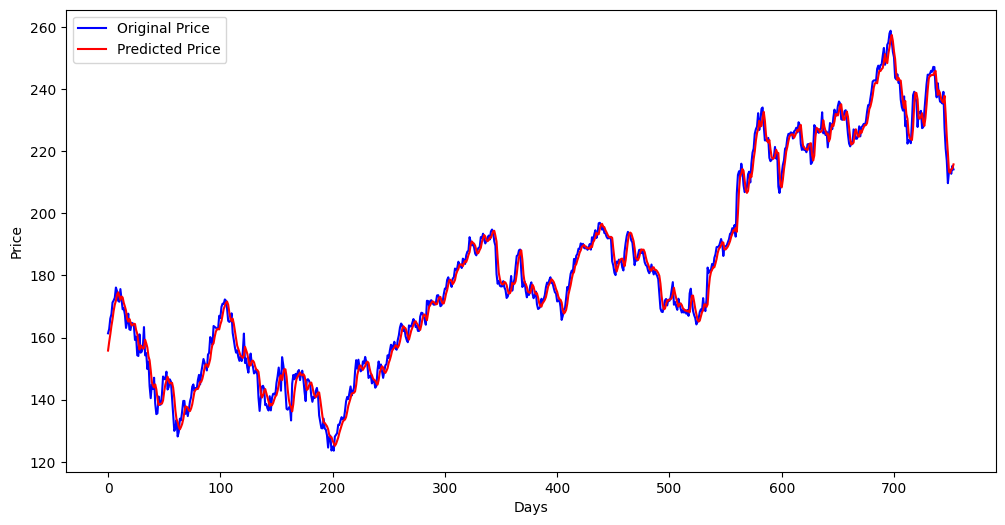

In [54]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.show()

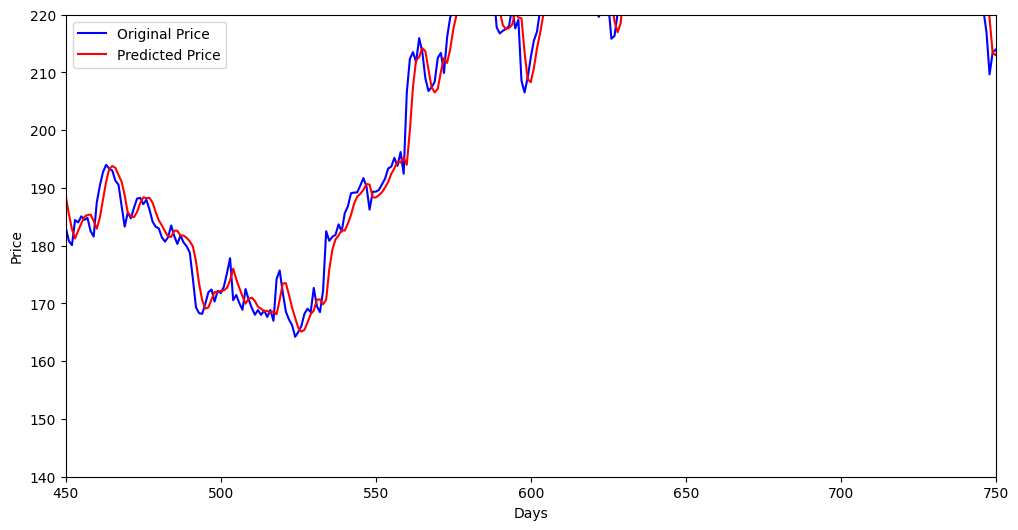

In [55]:
plt.figure(figsize=(12, 6))
plt.plot(y_test, 'b', label='Original Price')
plt.plot(y_predicted, 'r', label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.xlim(450, 750)
plt.ylim(140, 220)
plt.show()

# 10 Model Evaluation

In [56]:
# Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error, r2_score

In [57]:
mse = mean_squared_error(y_test, y_predicted)
print(f"Mean Squared Error (MSE): {mse}")

Mean Squared Error (MSE): 11.910352253226081


In [58]:
# Root %ean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f"Root Mean Squared Error (MSE): {rmse}")

Root Mean Squared Error (MSE): 3.4511378200857297


In [59]:
# R-Squared
r2 = r2_score(y_test, y_predicted)
print(f"R-Squared: {r2}")

R-Squared: 0.9888350493701731
